<a href="https://colab.research.google.com/github/cristianmontalba/Computer-Vision/blob/main/E01_17268815_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EXERCISE 01 – COMPUTER VISION  
*(2025 VERSION)*

<font color='red'>**WARNING-1:** Solutions that use methodologies other than those presented in class will not be accepted.
==
</font>


# 1) Import Libraries

(1 Point)

*All libraries used in this code must be placed in this cell. Only the libraries from the example covered in class are allowed.*




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# 2) Lines and Straight Lines

* Find the equation of the line that passes through the points (13, 15.2) and (-7.2, 18.2).
* Find the intersection of the line $y = 12x + 13$ with the line $y = -x/7$.



In [2]:
# Compute the slope m

x1 = 13
y1 = 15.2
x2 = -7.2
y2 = 18.2
m = (y2 - y1) / (x2 - x1)
print("Slope (m):", m)

# Intercept
n = y2 - m * x2
print("Intercept (n):", n)

# Line equation
print("Line equation: y = {:.6f}x + {:.6f}".format(m, n))

# Intersection: y = 12x + 13 with the line y = -x/7

# 12x + 13 = -x/7
# (12x + x/7 + 13 = 0) * 7
# 7*12x + 7*(x/7) + 7*13 = 0
# 84x + x + 91 = 0
# 85x + 91 = 0

x = -91 / 85
y = -x / 7  # Use the second equation to find y

print("x =", x)
print("y =", y)
print("Intersection: ({:.6f}, {:.6f})".format(x, y))


Slope (m): -0.1485148514851485
Intercept (n): 17.13069306930693
Line equation: y = -0.148515x + 17.130693
x = -1.0705882352941176
y = 0.15294117647058822
Intersection: (-1.070588, 0.152941)


# 3) Load the John Lennon Image and Display It

(1 Point)

*Read the image file located at the following link:*


`https://www.dropbox.com/s/g4hee0epvla4n5j/JohnLennon.jpg`



--2026-01-22 18:54:14--  https://www.dropbox.com/s/g4hee0epvla4n5j/JohnLennon.jpg?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/ds9vmznxcmhjjzqc0exgg/JohnLennon.jpg?rlkey=7qt6nqtyx66berbp5uut9jw0s&dl=1 [following]
--2026-01-22 18:54:14--  https://www.dropbox.com/scl/fi/ds9vmznxcmhjjzqc0exgg/JohnLennon.jpg?rlkey=7qt6nqtyx66berbp5uut9jw0s&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucee7e22ff22b0e6dd5d3584cb7f.dl.dropboxusercontent.com/cd/0/inline/C5d4RtYS3fFC_mgBGppfUwi90XD2cLeMu-1e6dvjevXvBWI23YLNIJGLfJeh-bXW_-31WWx5HnGFoKJ91pv_iAz9BxOCnZTph84Jo-FBe3HKGBnwUPlaVdIHeW_cBvTWm7M/file?dl=1# [following]
--2026-01-22 18:54:14--  https://ucee7e22ff22b0e6dd5d3584cb7f.dl.dropboxusercontent.com/cd/0/inl

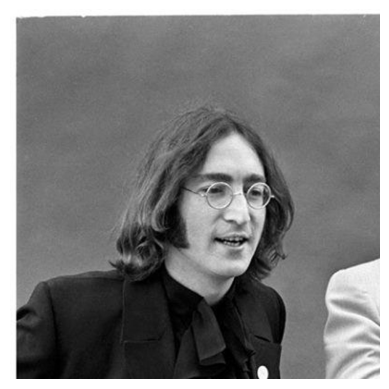

In [3]:
!wget -O JohnLennon.jpg "https://www.dropbox.com/s/g4hee0epvla4n5j/JohnLennon.jpg?dl=1"

# Load the image (cv2 loads images in BGR, convert to RGB)
I = cv2.imread('JohnLennon.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
plt.imshow(I)
plt.axis('off')
plt.show()


# 4) Load the (x, y) Coordinates of the 68 Landmarks

(1 Point)

*The coordinate files are:*

`https://www.dropbox.com/s/6xfjsz0ymbctbhr/JL_landmarks_x.npy`

`https://www.dropbox.com/s/18chd3jdw95vmt7/JL_landmarks_y.npy`

*Load the first file into `x` and the second file into `y`.*

Help: [How to load .npy files?](https://www.google.com/search?q=how+to+load+npy+files)


In [4]:
!wget -O JL_landmarks_x.npy "https://www.dropbox.com/s/6xfjsz0ymbctbhr/JL_landmarks_x.npy?dl=1"
!wget -O JL_landmarks_y.npy "https://www.dropbox.com/s/18chd3jdw95vmt7/JL_landmarks_y.npy?dl=1"

# Load the arrays and flatten them
x = np.load('JL_landmarks_x.npy').flatten()
y = np.load('JL_landmarks_y.npy').flatten()

# Display the arrays
print("Landmarks X:", x)
print("Landmarks Y:", y)


--2026-01-22 18:54:15--  https://www.dropbox.com/s/6xfjsz0ymbctbhr/JL_landmarks_x.npy?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/w3g26mnld0cc7xpg6s58n/JL_landmarks_x.npy?rlkey=ckjb9o7t70n2io2iv8xshhv63&dl=1 [following]
--2026-01-22 18:54:15--  https://www.dropbox.com/scl/fi/w3g26mnld0cc7xpg6s58n/JL_landmarks_x.npy?rlkey=ckjb9o7t70n2io2iv8xshhv63&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc72d118ab6c5188ee1e2de90d18.dl.dropboxusercontent.com/cd/0/inline/C5eJiWpfSSUV56HuY5hLRnmL3QSaAhnqJ7GNixsCaOJuu1e431VzsfQsDmvW9a4yhNd_VoJpE36d60BnZu_cMwIBD2_Vrhms90GueFKhF_Uzb3GtmFsg_TRUk6gpBCYlBLE/file?dl=1# [following]
--2026-01-22 18:54:16--  https://uc72d118ab6c5188ee1e2de90d18.dl.dropboxusercontent.

# 5) Display the 68 Landmarks on John Lennon's Face

(2 Points)

*You must display the 68 points over the image of John Lennon.*


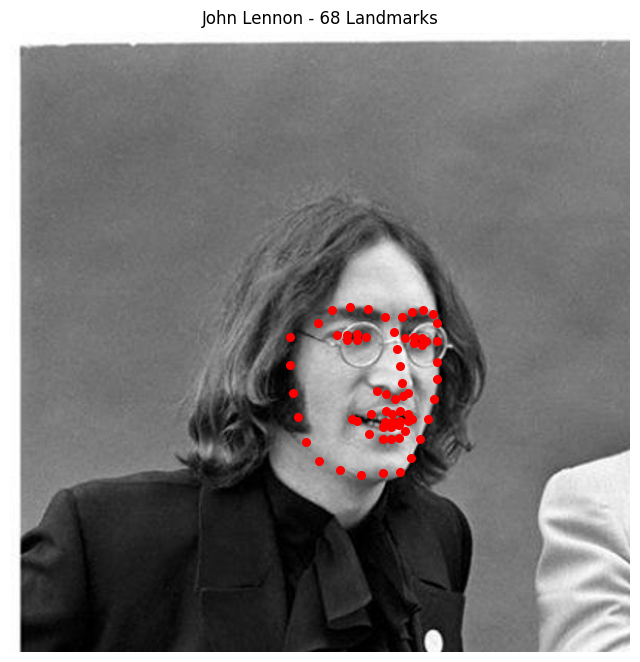

In [5]:
# Load the image (cv2 loads images in BGR, convert to RGB)
I = cv2.imread('JohnLennon.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

# Load the landmark points
x = np.load('JL_landmarks_x.npy')
y = np.load('JL_landmarks_y.npy')

# Plot the image and overlay the 68 landmarks
plt.figure(figsize=(8, 10))
plt.imshow(I)
plt.scatter(x, y, s=30, c='red')  # visible red points
plt.title('John Lennon - 68 Landmarks')
plt.axis('off')
plt.show()


# Using the scheme shown in the following figure, determine the direction John Lennon is facing in the loaded image.


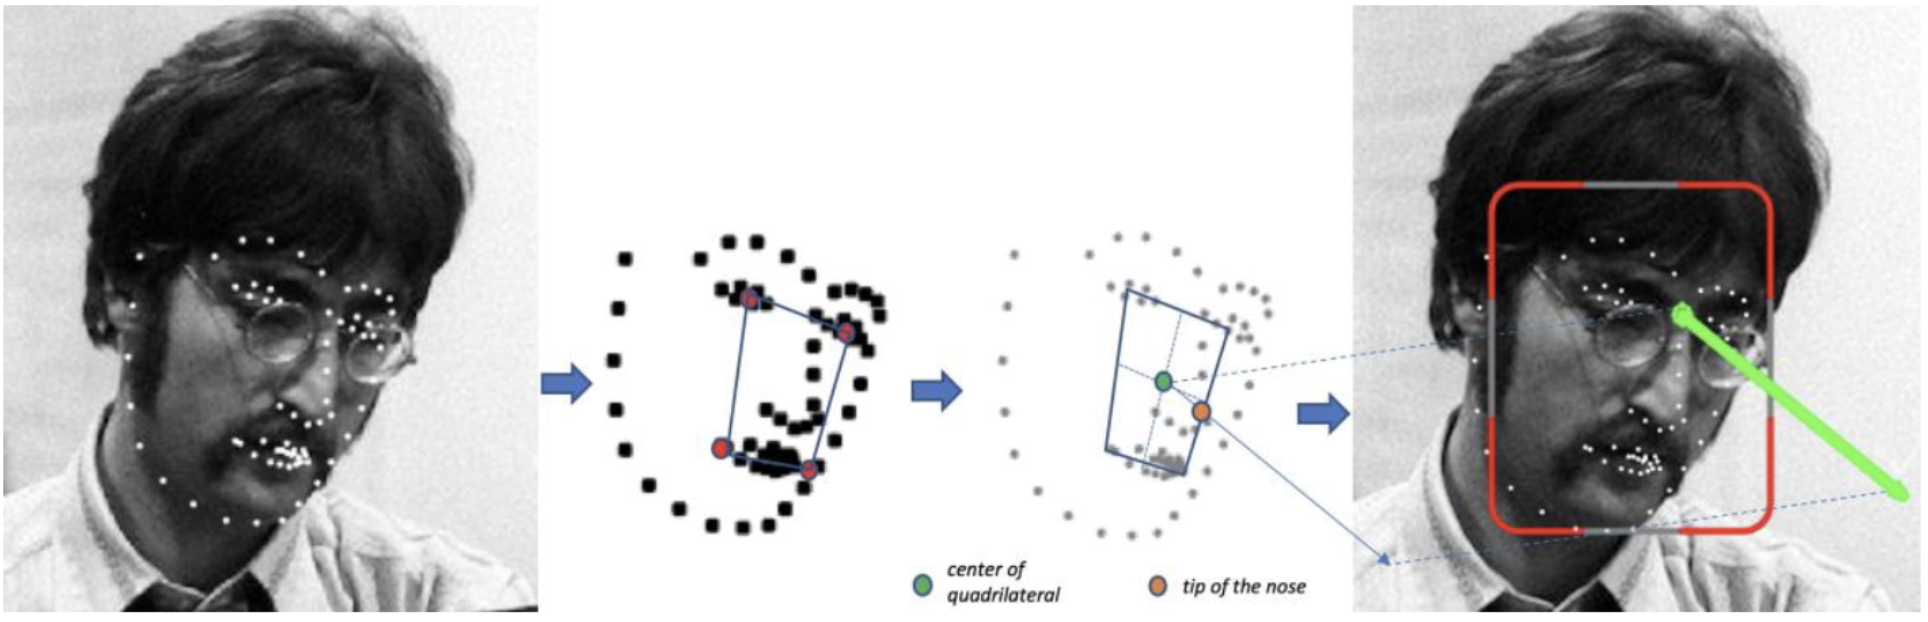

# 6) Find the Quadrilateral Defined by the Eyes and Mouth Corners

(2 Points)

*Following the scheme shown in the figure, display the quadrilateral formed by the four red points. You must show the four points and the quadrilateral lines over the image of John Lennon.*

[How are the 68 landmarks defined?](https://github.com/domingomery/vision/blob/master/clases/Cap02_Geometria/practice/facial_landmarks_68markup.jpg)


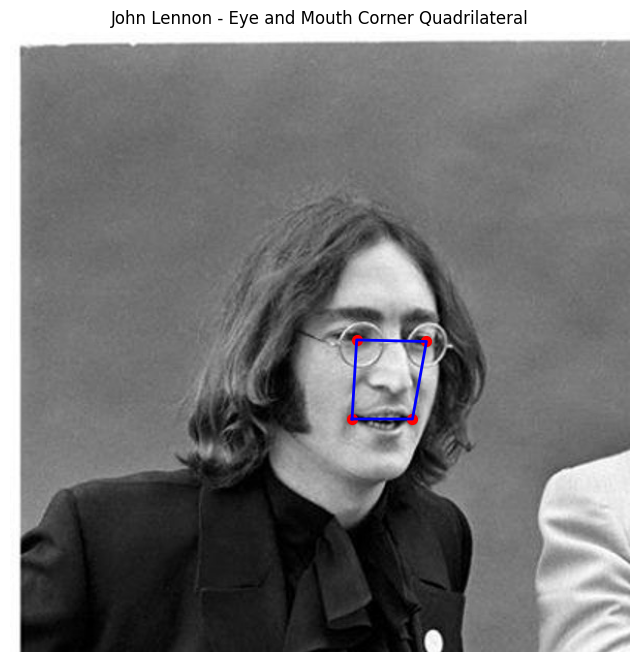

In [6]:
# Plot the image and overlay the 68 landmarks

# Load the image (cv2 loads in BGR)
I = cv2.imread('JohnLennon.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

# Load the points
x = np.load('JL_landmarks_x.npy')
y = np.load('JL_landmarks_y.npy')

# Points to draw the quadrilateral
quad_x = [x[0,48], x[0,40], x[0,45], x[0,54], x[0,48]]
quad_y = [y[0,48], y[0,40], y[0,45], y[0,54], y[0,48]]

# Plot the image and the landmarks
plt.figure(figsize=(8, 10))
plt.imshow(I)
plt.plot(quad_x, quad_y, c='blue', linewidth=2)  # quadrilateral
plt.scatter(quad_x[:-1], quad_y[:-1], s=50, c='red')  # mark the 4 points of the quadrilateral
plt.title('John Lennon - Eye and Mouth Corner Quadrilateral')
plt.axis('off')
plt.show()


# 7) Define the homogeneous coordinates of the four quadrilateral points

(1 Point)

Define the following 4 points in homogeneous coordinates and print them using print.

Point m1: left eye

Point m2: right eye

Point m3: left corner of the mouth

Point m4: right corner of the mouth

In [7]:
m1 = [x[0,40], y[0,40], 1]
m2 = [x[0,45], y[0,45], 1]
m3 = [x[0,48], y[0,48], 1]
m4 = [x[0,54], y[0,54], 1]

print('left eye', m1)
print('right eye', m2)
print('left corner of the mouth', m3)
print('right corner of the mouth', m4)


left eye [np.float64(335.0), np.float64(297.5), 1]
right eye [np.float64(402.5), np.float64(299.0), 1]
left corner of the mouth [np.float64(330.5), np.float64(374.0), 1]
right corner of the mouth [np.float64(389.0), np.float64(374.0), 1]


# 8) Find mc, the center of the quadrilateral, and display it

(2 Points)

Using the methodology seen in class — with homogeneous coordinates — find the center of the quadrilateral as the intersection of the line passing through (m1 and m4) with the line passing through (m2 and m3).

You should display the four points of the quadrilateral, the quadrilateral lines, and the center of the quadrilateral on the image of John Lennon.


line_1 [ -76.5   54.  9562.5]
line_2 [  -75.    -72.  51715.5]
(xi, yi) = (np.float64(364.2118644067797), np.float64(338.88347457627117))


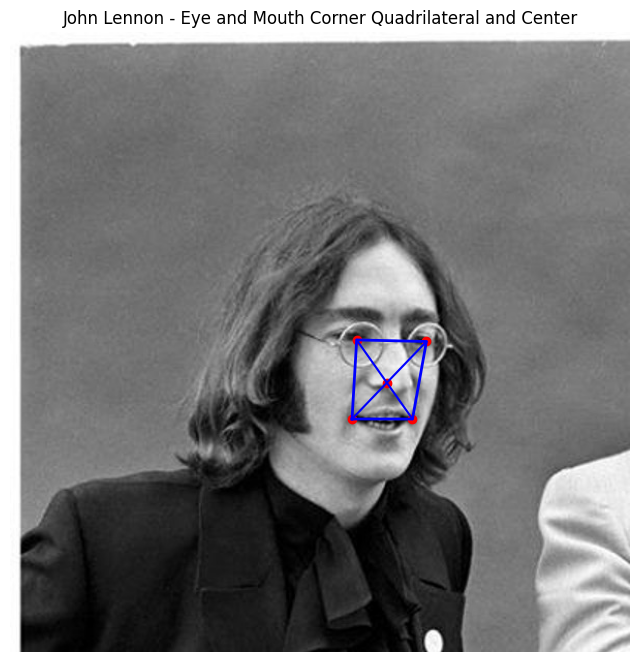

In [8]:
# QUESTION 8: WRITE CODE HERE
m1 = [x[0,40], y[0,40], 1]
m2 = [x[0,45], y[0,45], 1]
m3 = [x[0,48], y[0,48], 1]
m4 = [x[0,54], y[0,54], 1]

# Lines passing through the points
line_1 = np.cross(m1, m4)
line_2 = np.cross(m2, m3)
print('line_1', line_1)
print('line_2', line_2)

# Intersection of the lines = center of the quadrilateral
mc = np.cross(line_1, line_2)
xi = mc[0] / mc[2]
yi = mc[1] / mc[2]
print('(xi, yi) =', (xi, yi))

# Load image
I = cv2.imread('JohnLennon.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

# Points to draw the quadrilateral
quad_x = [x[0,48], x[0,40], x[0,45], x[0,54], x[0,48]]
quad_y = [y[0,48], y[0,40], y[0,45], y[0,54], y[0,48]]

# Plot image, quadrilateral, and center
plt.figure(figsize=(8, 10))
plt.imshow(I)
plt.scatter(xi, yi, c='red')  # center of quadrilateral
plt.plot(quad_x, quad_y, c='blue', linewidth=2)  # quadrilateral

# Lines connecting opposite points
x1 = [m1[0], m4[0]]
y1 = [m1[1], m4[1]]

x2 = [m2[0], m3[0]]
y2 = [m2[1], m3[1]]
plt.plot(x1, y1, color='blue')
plt.plot(x2, y2, color='blue')

plt.scatter(quad_x[:-1], quad_y[:-1], c='red')  # mark the 4 quadrilateral points
plt.title('John Lennon - Eye and Mouth Corner Quadrilateral and Center')
plt.axis('off')
plt.show()


# 9) Which way is John Lennon looking? (Part 1)

(2 Points)

Find the equation of the line passing through mc (the quadrilateral center) and the tip of the nose, and plot that line from mc to mq, where mq is the point on the line at x = 500.

You should display the four quadrilateral points, the quadrilateral lines, the center of the quadrilateral, and the line you found, over the image of John Lennon.

line_1 [ -76.5   54.  9562.5]
line_2 [  -75.    -72.  51715.5]
(xi, yi) = (np.float64(364.2118644067797), np.float64(338.88347457627117))
Line equation: y = 0.043149466192172095x + 323.1679270462629
(x, y) = (500, np.float64(344.74266014234894))


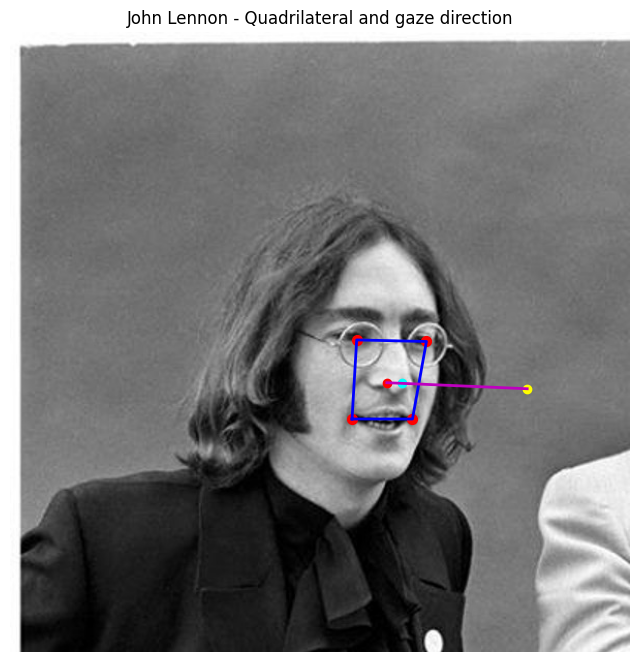

In [9]:
# Quadrilateral center landmarks
m1 = [x[0,40], y[0,40], 1]
m2 = [x[0,45], y[0,45], 1]
m3 = [x[0,48], y[0,48], 1]
m4 = [x[0,54], y[0,54], 1]

# Lines in homogeneous coordinates
line_1 = np.cross(m1, m4)
line_2 = np.cross(m2, m3)
print('line_1', line_1)
print('line_2', line_2)

# Intersection = center mc
mc = np.cross(line_1, line_2)
xi = mc[0] / mc[2]
yi = mc[1] / mc[2]
print('(xi, yi) =', (xi, yi))

# Nose landmark
nose = [x[0,30], y[0,30]]

# Slope from mc to nose
m = (nose[1] - yi) / (nose[0] - xi)

# Y-intercept
n = yi - m * xi
print(f"Line equation: y = {m}x + {n}")

# Compute mq at x = 500
x_mq = 500
y_mq = m * x_mq + n
print('(x, y) =', (x_mq, y_mq))

# Load image
I = cv2.imread('JohnLennon.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

# Plot image and landmarks
plt.figure(figsize=(8, 10))
plt.imshow(I)

# Quadrilateral
plt.plot(quad_x, quad_y, c='blue', linewidth=2)
plt.scatter(quad_x[:-1], quad_y[:-1], s=50, c='red')

# Center mc
plt.scatter(xi, yi, c='red')

# Nose
plt.scatter(nose[0], nose[1], c='cyan')

# Line from mc to mq
plt.plot([xi, x_mq], [yi, y_mq], 'm-', linewidth=2)

# Point mq
plt.scatter(x_mq, y_mq, c='yellow')

plt.title('John Lennon - Quadrilateral and gaze direction')
plt.axis('off')
plt.show()


# 10) Which way is John Lennon looking? (Part 2)

(2 Points)

Translate the line found in the previous step so that it starts not from mc, but from mt, defined as the midpoint between m1 and m2.

You should display the new line on the image of John Lennon.

Answer 10 - Alternative 1

Midpoint mt: (np.float64(368.75), np.float64(298.25))


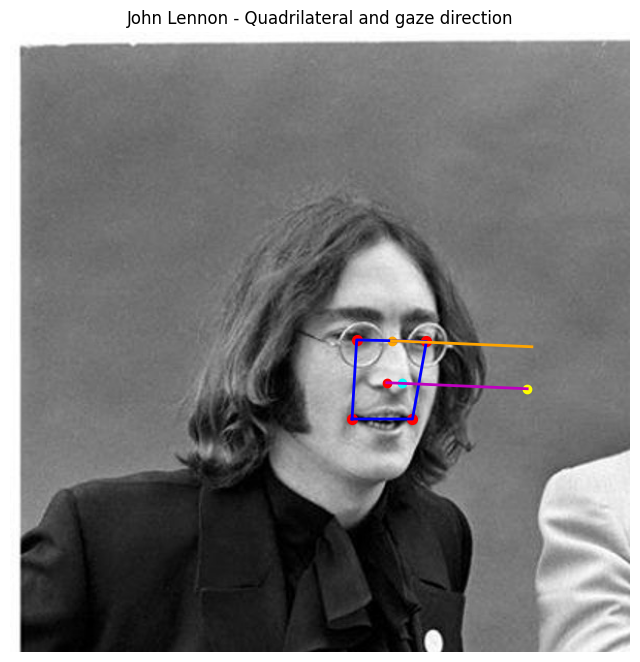

In [10]:
# QUESTION 10: WRITE CODE HERE
nose = [x[0,30], y[0,30]]
m1 = [x[0,40], y[0,40], 1]
m2 = [x[0,45], y[0,45], 1]

# Midpoint mt between m1 and m2
mx = (m1[0] + m2[0]) / 2
my = (m1[1] + m2[1]) / 2
print("Midpoint mt:", (mx, my))

# Keep the direction from mc -> mq
dx = x_mq - xi
dy = y_mq - yi

# New endpoint from mt
newpoint_x = mx + dx
newpoint_y = my + dy

# Load image
I = cv2.imread('JohnLennon.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 10))
plt.imshow(I)

# Quadrilateral
plt.plot(quad_x, quad_y, c='blue', linewidth=2)
plt.scatter(quad_x[:-1], quad_y[:-1], s=50, c='red')

# Center mc
plt.scatter(xi, yi, c='red')

# Nose
plt.scatter(nose[0], nose[1], c='cyan')

# Original line mc -> mq
plt.plot([xi, x_mq], [yi, y_mq], 'm-', linewidth=2)

# Point mq
plt.scatter(x_mq, y_mq, c='yellow')

# Midpoint mt and new line
plt.scatter(mx, my, c='orange')
plt.plot([mx, newpoint_x], [my, newpoint_y], 'orange', linewidth=2)

plt.title('John Lennon - Quadrilateral and gaze direction')
plt.axis('off')
plt.show()


Answer 10 - Alternative 2

Midpoint mt: (np.float64(368.75), np.float64(298.25))
(x, y) = (500, np.float64(344.74266014234894))


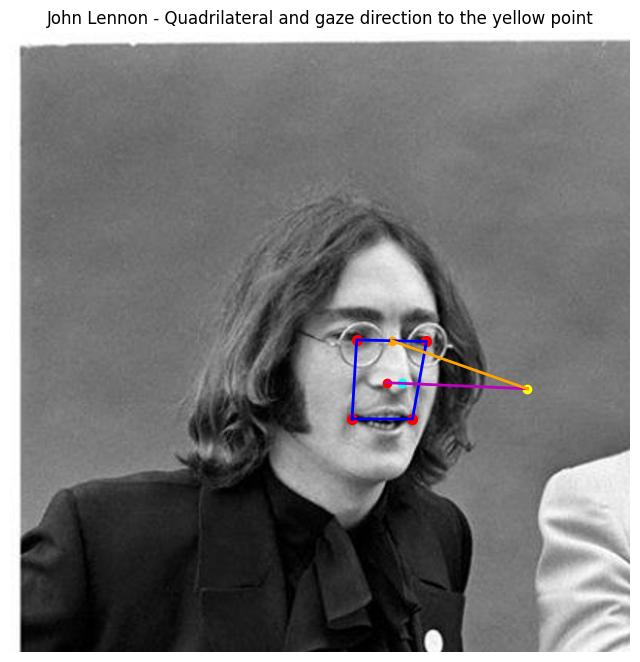

In [11]:
# QUESTION 10: WRITE CODE HERE
nose = [x[0,30], y[0,30]]
m1 = [x[0,40], y[0,40], 1]
m2 = [x[0,45], y[0,45], 1]

# Midpoint mt between m1 and m2
mx = (m1[0] + m2[0]) / 2
my = (m1[1] + m2[1]) / 2
print("Midpoint mt:", (mx, my))

# Keep the direction from mc -> mq
dx = x_mq - xi
dy = y_mq - yi

# New endpoint from mt
newpoint_x = mx + dx
newpoint_y = my + dy

# Compute mq at x = 500
x_mq = 500
y_mq = m * x_mq + n
print('(x, y) =', (x_mq, y_mq))

# Load image
I = cv2.imread('JohnLennon.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 10))
plt.imshow(I)

# Quadrilateral
plt.plot(quad_x, quad_y, c='blue', linewidth=2)
plt.scatter(quad_x[:-1], quad_y[:-1], s=50, c='red')

# Center mc
plt.scatter(xi, yi, c='red')

# Nose
plt.scatter(nose[0], nose[1], c='cyan')

# Original line mc -> mq
plt.plot([xi, x_mq], [yi, y_mq], 'm-', linewidth=2)

# Point mq
plt.scatter(x_mq, y_mq, c='yellow')

# Midpoint mt and new line
plt.scatter(mx, my, c='orange')
plt.plot([mx, x_mq], [my, y_mq], 'orange', linewidth=2)

plt.title('John Lennon - Quadrilateral and gaze direction to the yellow point')
plt.axis('off')
plt.show()
